In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('energy_dataset.csv')
print("="*50)
print( "First Five Rows", "\n")
print (data. head(2) , "\n" )
print ("="*50)
print( "Information About Dataset" , )
print (data. info( ) , "\n" )
print("="*50)
print( "Describe the Dataset")
print (data.describe(), "\n")
print("=","\n")
print( "Null Values t","\n")
print(data.isnull().sum(), "\n")

First Five Rows 

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.

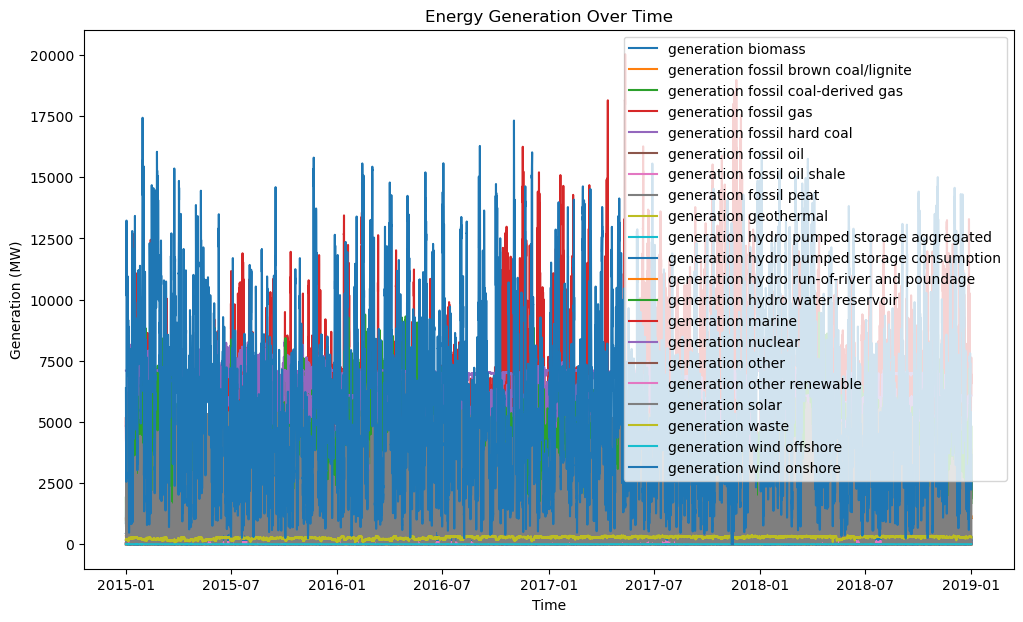

In [3]:
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
plt.figure(figsize=(12, 7))
for column in data.columns:
    if 'generation' in column:
        plt.plot(data.index, data[column], label=column)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.title('Energy Generation Over Time')
plt.show()

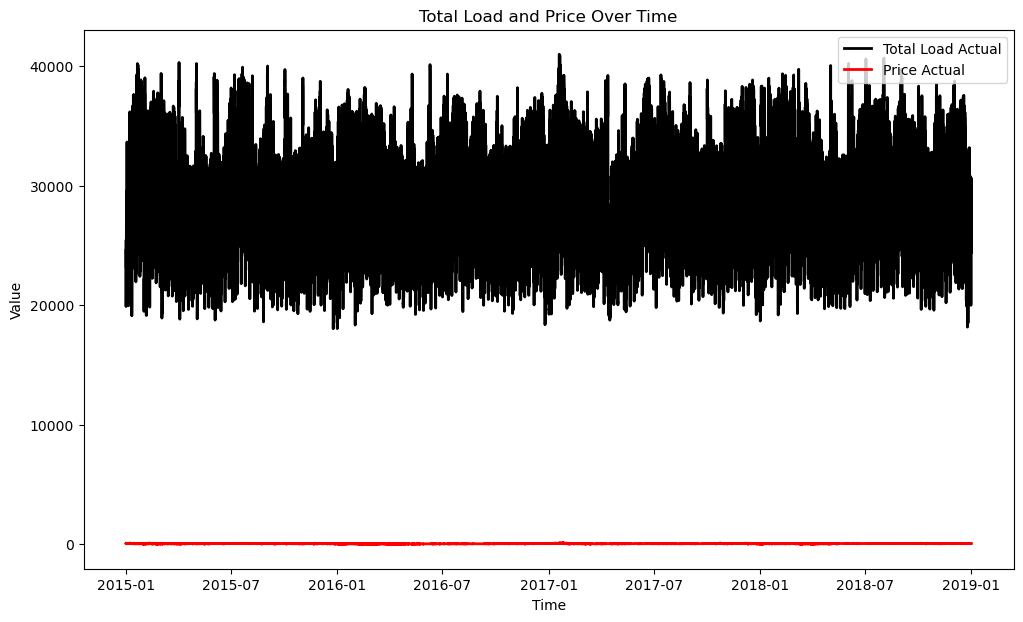

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['total load actual'], label='Total Load Actual', color='black', linewidth=2)
plt.plot(data.index, data['price actual'], label='Price Actual', color='red', linewidth=2)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Total Load and Price Over Time')
plt.show()

In [5]:
data = pd.read_csv('energy_dataset.csv',parse_dates=['time'], index_col='time')

In [6]:
data.fillna(method='ffill', inplace=True)

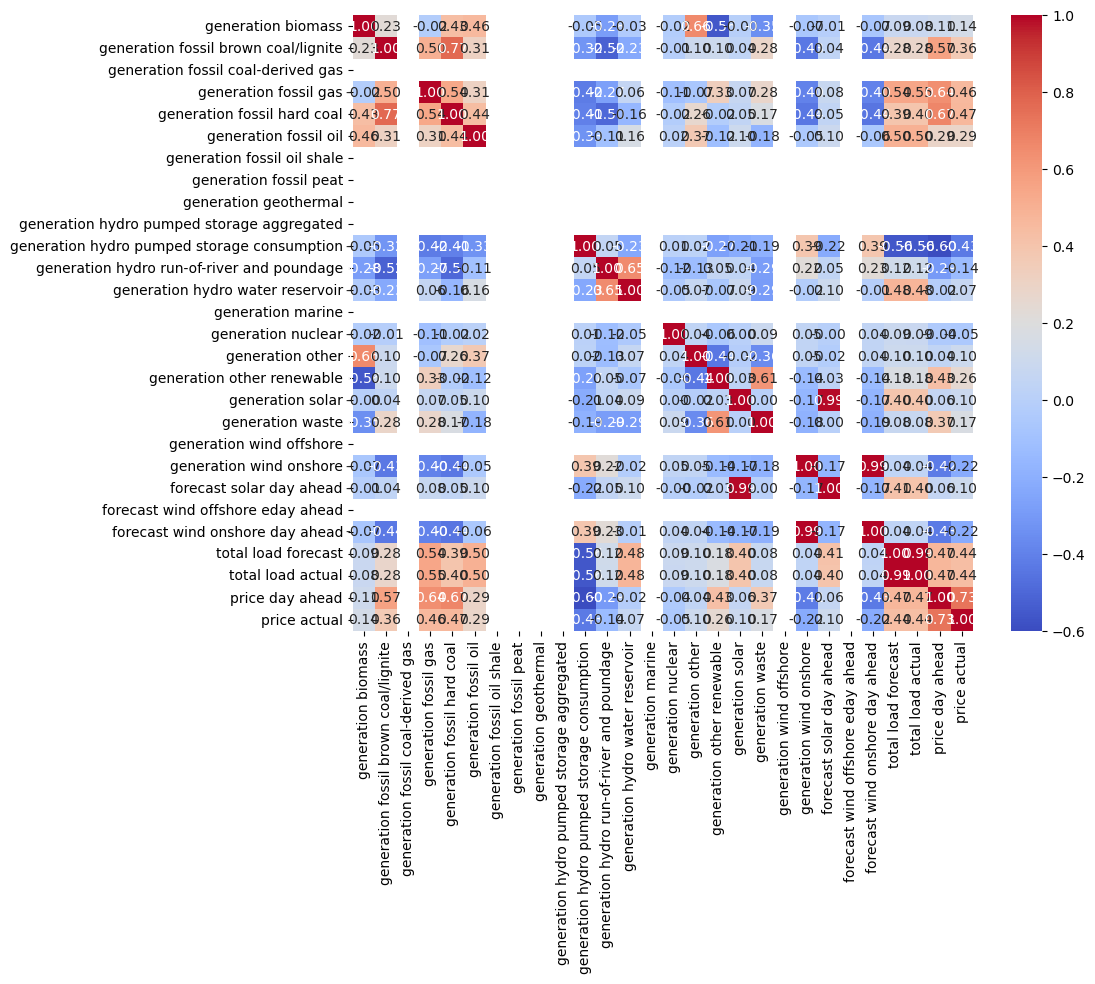

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

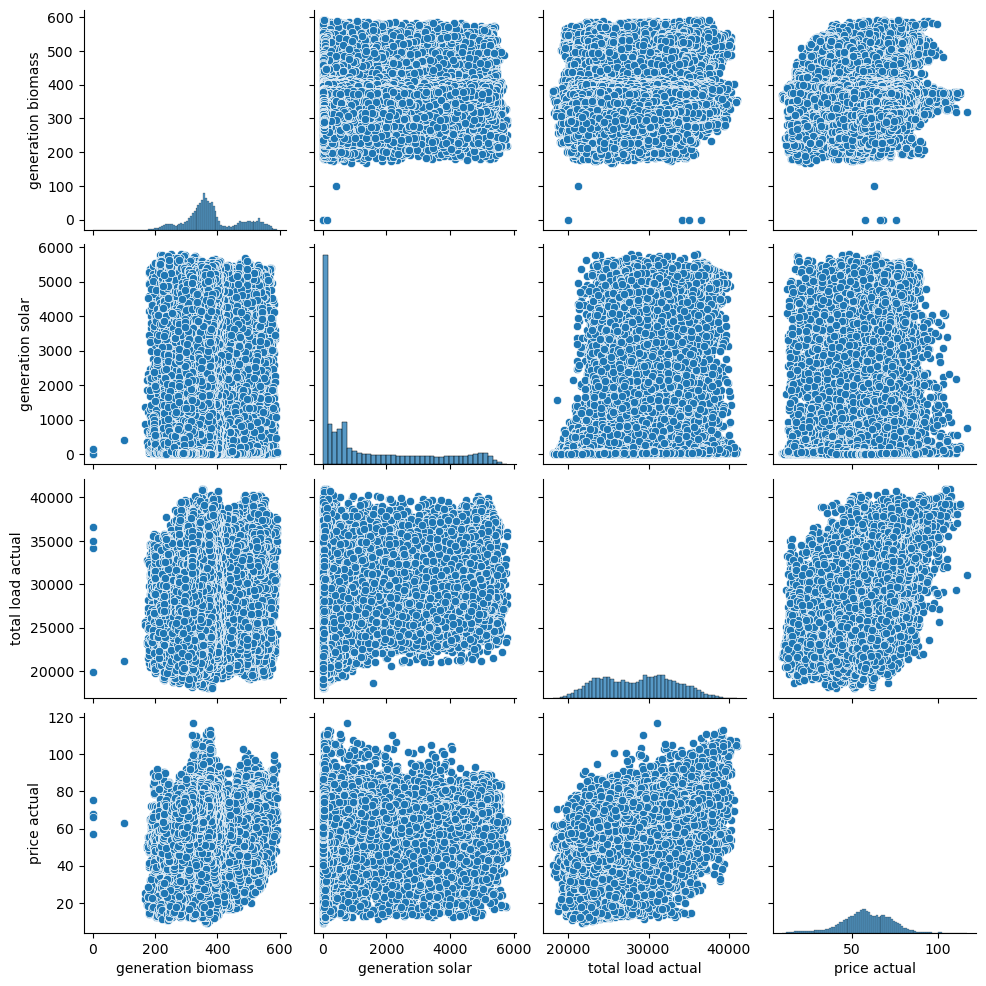

In [8]:
sns.pairplot(data[['generation biomass', 'generation solar', 'total load actual', 'price actual']])
plt.show()

In [9]:
X = data[['generation biomass', 'generation solar', 'forecast solar day ahead']]
y = data['total load actual']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 17495608.072233584
R^2 Score: 0.16116928344622627


In [13]:
future_data = pd.DataFrame({
    'generation biomass': [500],
    'generation solar': [100],
    'forecast solar day ahead': [110]
})
future_load = model.predict(future_data)
print(f'Predicted Future Load: {future_load[0]}')

Predicted Future Load: 27776.76600291594


In [14]:
data = pd.read_csv('weather_features.csv')
print("="*50)
print( "First Five Rows", "\n")
print (data. head(2) , "\n" )
print ("="*50)
print( "Information About Dataset" , )
print (data. info( ) , "\n" )
print("="*50)
print( "Describe the Dataset")
print (data.describe(), "\n")
print("=","\n")
print( "Null Values t","\n")
print(data.isnull().sum(), "\n")

First Five Rows 

                      dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n   

Information About Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            17839

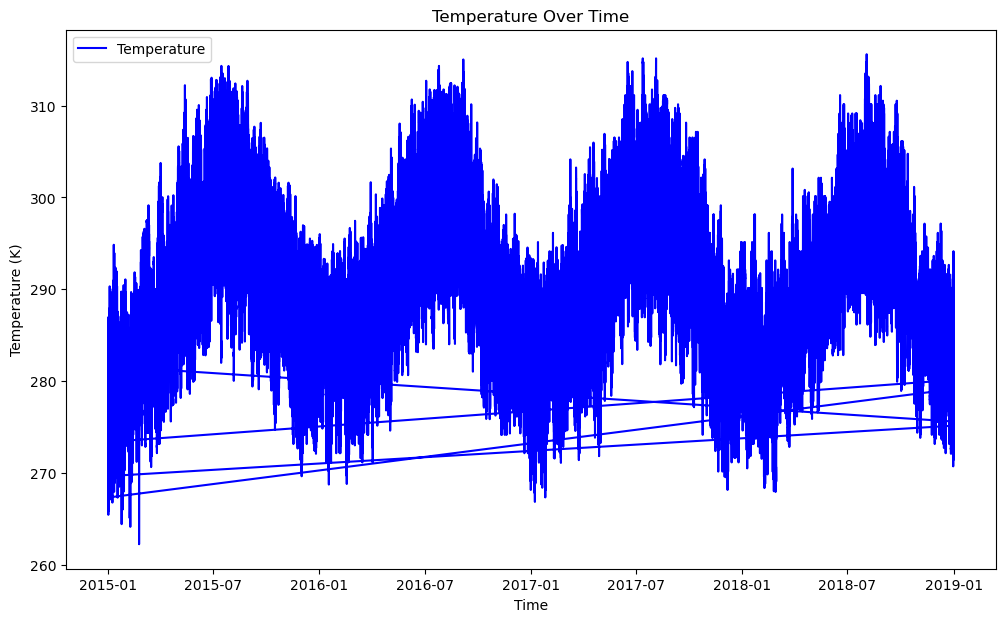

In [15]:
data['dt_iso'] = pd.to_datetime(data['dt_iso'],utc=True)
data['year'] = data['dt_iso'].dt.year
data['month'] = data['dt_iso'].dt.month
data['day'] = data['dt_iso'].dt.day
data['hour'] = data['dt_iso'].dt.hour
data.set_index('dt_iso', inplace=True)
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['temp'], label='Temperature', color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.title('Temperature Over Time')
plt.show()

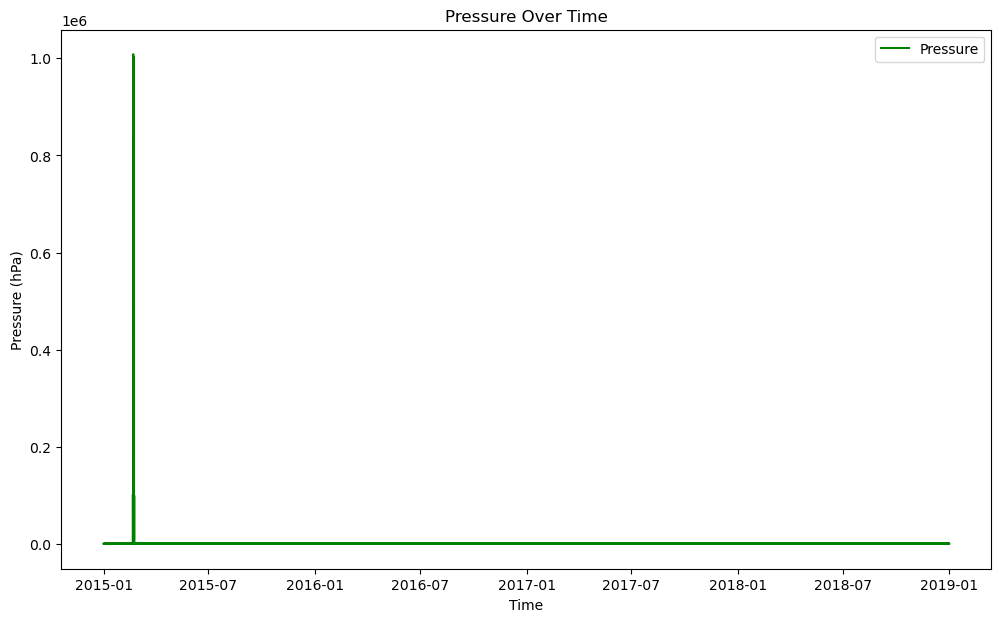

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['pressure'], label='Pressure', color='green')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Over Time')
plt.show()

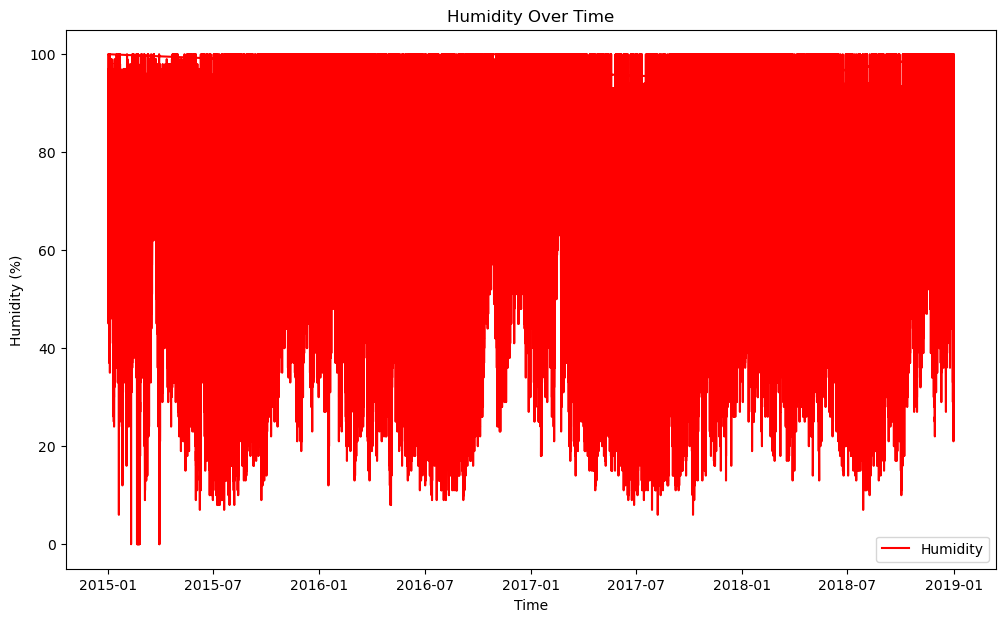

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['humidity'], label='Humidity', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.show()

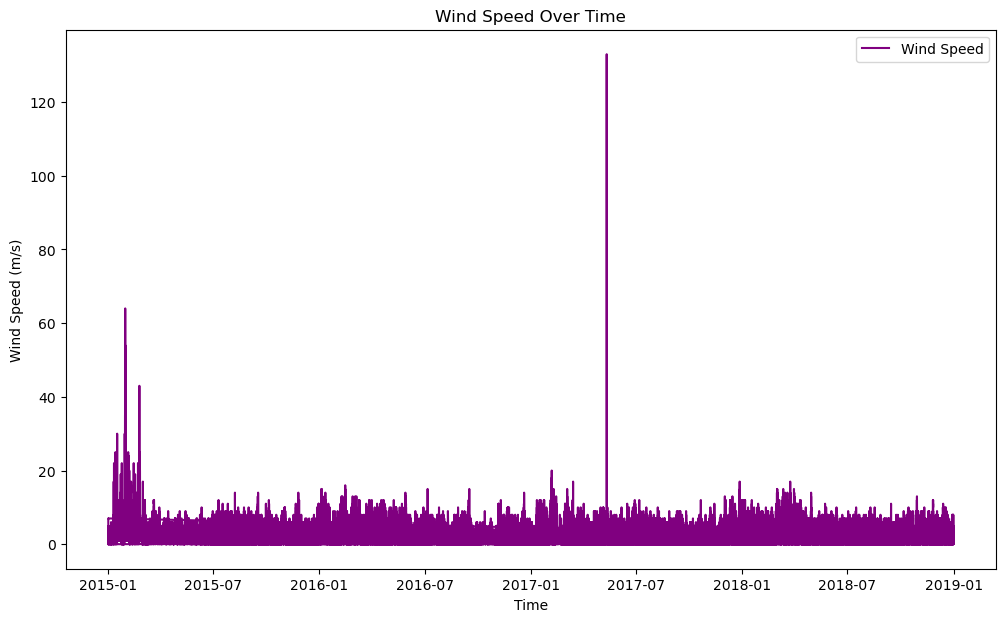

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['wind_speed'], label='Wind Speed', color='purple')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.show()

In [19]:
data = pd.get_dummies(data, columns=['city_name', 'weather_main', 'weather_description', 'weather_icon'])

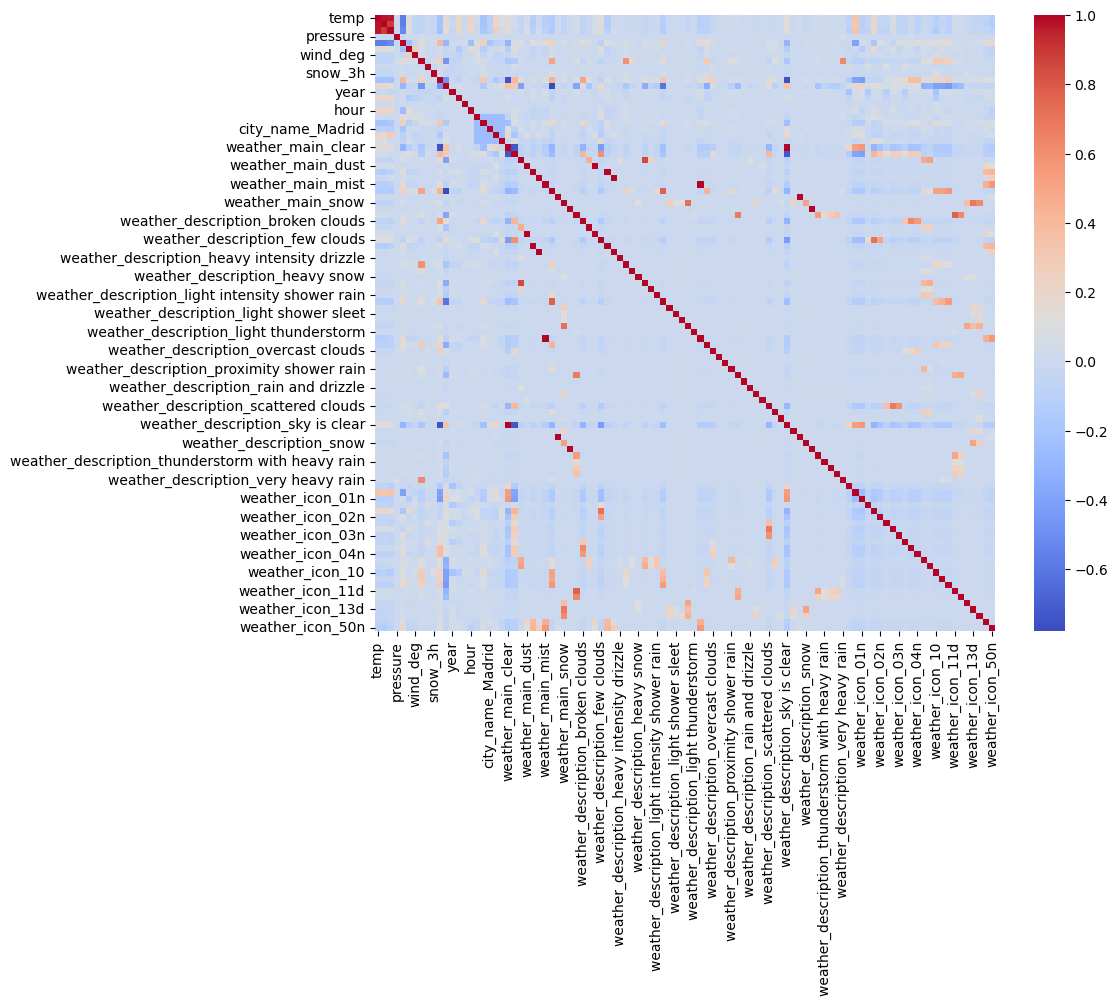

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

In [21]:
X = data.drop('temp', axis=1)
y = data['temp']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.07229736587120174
R^2 Score: 0.9988889175094405


In [27]:
future_data = X_test.iloc[0].values.reshape(1, -1)
predicted_temp = model.predict(future_data)
print(f'Predicted Temperature: {predicted_temp[0]}')

Predicted Temperature: 286.0343000000001


C:\Users\Srinath\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print( "First Five Rows", "\n")
print (df. head(2) , "\n" )
print ("="*50)
print( "Information About Dataset" , )
print (df. info( ) , "\n" )
print("="*50)
print( "Describe the Dataset")
print (df.describe(), "\n")
print("=","\n")
print( "Null Values t","\n")
print(df.isnull().sum(), "\n")

First Five Rows 

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

= 

Null Values t 

Datetime    0
AEP_MW      0
dtype: int64 



In [29]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\3318638198.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [30]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year",df.Year.nunique(),"\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

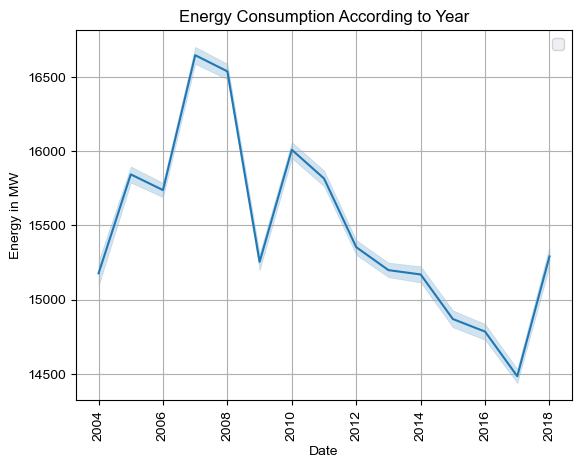

In [31]:
from matplotlib import style
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
style.use('ggplot')
sns.lineplot(x=dataset['Year'],y=dataset['AEP_MW'],data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.title("Energy Consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()
for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)
plt.title("Energy Consumption According to Year")

C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\4180807346.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004 = dataset['2004']['AEP_MW'].to_list()
C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\4180807346.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004 = dataset['2004']['Date'].to_list()
C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\4180807346.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005 = dataset['2005']['AEP_MW'].to_list()
C:\Users\Srinat

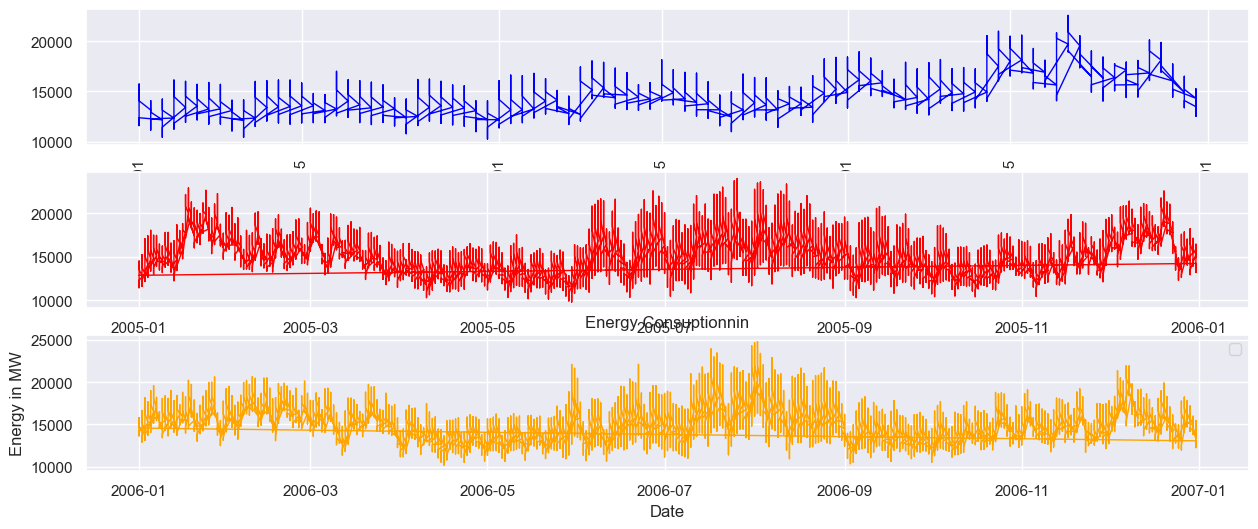

In [32]:
from matplotlib import style
fig=plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
y_2004 = dataset['2004']['AEP_MW'].to_list()
x_2004 = dataset['2004']['Date'].to_list()
ax1.plot(x_2004,y_2004,color ='blue',linewidth=1)
y_2005 = dataset['2005']['AEP_MW'].to_list()
x_2005 = dataset['2005']['Date'].to_list()
ax2.plot(x_2005,y_2005,color ='red',linewidth=1)
y_2006 = dataset['2006']['AEP_MW'].to_list()
x_2006 = dataset['2006']['Date'].to_list()
ax3.plot(x_2006,y_2006,color ='orange',linewidth=1)
plt.rcParams['figure.figsize']=(10,8)
plt.title('Energy Consuptionnin')
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()
for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)


C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\3605550283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['AEP_MW'])


Text(0.5, 1.0, 'Energy Distribution')

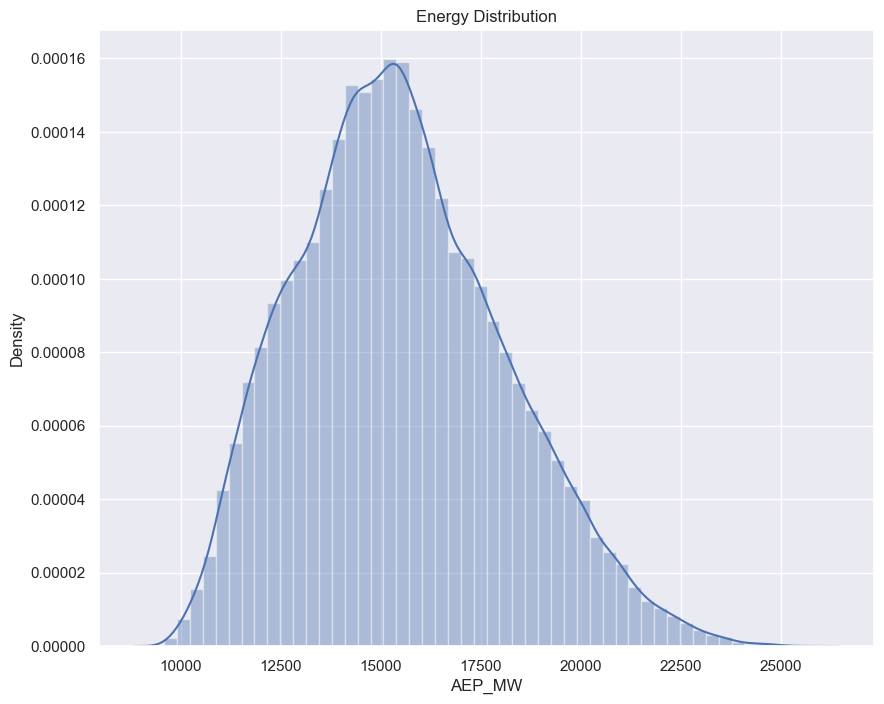

In [33]:
sns.distplot(dataset['AEP_MW'])
plt.title("Energy Distribution")

In [34]:
NewDataset = dataset.resample('D').mean()


C:\Users\Srinath\AppData\Local\Temp\ipykernel_13160\2295563136.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataset = dataset.resample('D').mean()


In [35]:
print("old dataset : ",dataset.shape)
print("New dataset : ",NewDataset.shape)

old dataset :  (121273, 7)
New dataset :  (5055, 4)


In [36]:
TestData = NewDataset.tail(100)
Training_set = NewDataset.iloc[:,0:1]
Training_set = Training_set[:-60]

In [37]:
print("Traing Set Shape ",Training_set.shape)
print("Test Set Shape ",TestData.shape)

Traing Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
Train = sc.fit_transform(Training_set)

In [39]:
Training_set = np.array(Training_set)

In [40]:
x_train=[]
y_train=[]
for i in range(60,Train.shape[0]):
  x_train.append(Train[i-60:i])
  y_train.append(Train[i])
x_train = np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(4935, 60, 1)
(4935, 1)


In [41]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4935, 60, 1)

In [42]:
!pip install tensorflow


In [43]:
!pip install keras

In [44]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [46]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
print(regressor.summary())


C:\Users\Srinath\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [47]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - loss: 0.0382
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 0.0187
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - loss: 0.0181
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0170
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0162
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 0.0147
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - loss: 0.0156
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 0.0147
Epoch 9/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - loss: 0.0128
Epoch 10/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 39s 144ms/step - loss: 0.0105
Epoch 11/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - loss: 0.0100
Epoch 12/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - loss: 0.0087
Epoch 13/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - loss: 0.0084
Epoch 14/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - loss: 0.0078
E

In [48]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [49]:
TestData.shape

(100, 4)

In [50]:
NewDataset.shape


(5055, 4)

In [51]:
Df_Total = pd.concat((NewDataset[["AEP_MW"]],TestData[["AEP_MW"]]),axis=0)

In [52]:
Df_Total.shape

(5155, 1)

In [53]:
inputs = Df_Total[len(Df_Total)- len(TestData)-60:].values
inputs.shape

(160, 1)

In [54]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,160):
  x_test.append(inputs[i-60:i])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\Srinath\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step


In [55]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = predicted_stock_price
dates = TestData.index.to_list()

In [56]:
Machine_Df = pd.DataFrame(data ={
    "Date" : dates,
    "TrueMegaWatt" : True_MegaWatt,
    "PredictedMegaWatt" : [x[0] for x in Predicted_MegaWatt]
})

In [57]:
Machine_Df

,Date,TrueMegaWatt,PredictedMegaWatt
0,2018-04-26,13157.791667,13599.057617
1,2018-04-27,12964.000000,13275.823242
2,2018-04-28,12237.583333,14774.568359
3,2018-04-29,12156.791667,13859.761719
4,2018-04-30,13443.500000,13410.771484
...,...,...,...
95,2018-07-30,15368.083333,15436.796875
96,2018-07-31,15180.291667,15730.129883
97,2018-08-01,15151.166667,15182.908203
98,2018-08-02,15687.666667,16103.295898


In [58]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = [x[0] for x in Predicted_MegaWatt]
dates = TestData.index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


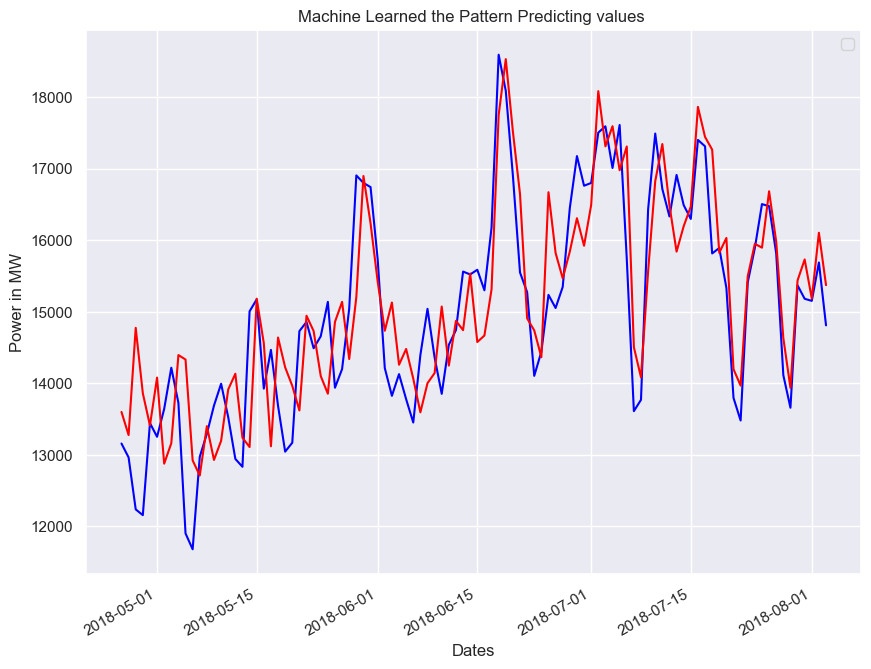

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = dates
y= True_MegaWatt
y1= Predicted_MegaWatt
plt.plot(x,y,color="blue")
plt.plot(x,y1,color="red")
plt.gcf().autofmt_xdate()
plt.xlabel("Dates")
plt.ylabel('Power in MW')
plt.title("Machine Learned the Pattern Predicting values ")
plt.legend()